In [1]:
import pandas as pd
import tensorflow as tf
import utils

preprocess_input_nasnet = tf.keras.applications.nasnet.preprocess_input
preprocess_input_resnet = tf.keras.applications.resnet.preprocess_input
preprocess_input_xception = tf.keras.applications.xception.preprocess_input
preprocess_input_effb7 = tf.keras.applications.efficientnet.preprocess_input
preprocess_input_inceptionresnetv2 = tf.keras.applications.inception_resnet_v2.preprocess_input
preprocess_input_mobilenetv2 = tf.keras.applications.mobilenet_v2.preprocess_input
preprocess_input_mobilenetv3L = tf.keras.applications.mobilenet_v3.preprocess_input
preprocess_input_resnetrs = tf.keras.applications.resnet_rs.preprocess_input

2024-07-30 10:08:24.253530: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 10:08:24.496223: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 10:08:24.496256: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 10:08:24.497471: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 10:08:24.609822: I tensorflow/core/platform/cpu_feature_g

In [2]:
fundus_train = "/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/Dataset/split1/train"
fundus_test = "/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/Dataset/split1/test"


BATCH_SIZE = 32
IMG_HEIGHT, IMG_WIDTH = 224,224
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    fundus_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    seed=123,
)
IMG_HEIGHT_x, IMG_WIDTH_x = 299,299
test_dataset_xception = tf.keras.preprocessing.image_dataset_from_directory(
    fundus_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT_x, IMG_WIDTH_x),
    shuffle=False,
    seed=123,
)
IMG_HEIGHT_mobilenet, IMG_WIDTH_mobilenet = 512,512
test_dataset_mobilenet = tf.keras.preprocessing.image_dataset_from_directory(
    fundus_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT_mobilenet, IMG_WIDTH_mobilenet),
    shuffle=False,
    seed=123,
)

Found 845 files belonging to 4 classes.
Found 845 files belonging to 4 classes.
Found 845 files belonging to 4 classes.


2024-07-30 10:08:26.758861: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-30 10:08:26.882058: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-30 10:08:26.884577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
test_datagen_nasnet = test_dataset.map(lambda x, y: (preprocess_input_nasnet(x), y))
test_datagen_resnet = test_dataset.map(lambda x, y: (preprocess_input_resnet(x), y))
test_datagen_xception = test_dataset_xception.map(lambda x, y: (preprocess_input_xception(x), y))
test_datagen_effb7 = test_dataset.map(lambda x, y: (preprocess_input_effb7(x), y))
test_datagen_inceptionresnetv2 = test_dataset_xception.map(lambda x, y: (preprocess_input_inceptionresnetv2(x), y))
test_datagen_mobilenetv2 = test_dataset_mobilenet.map(lambda x, y: (preprocess_input_mobilenetv2(x), y))
test_datagen_mobilenetv3L = test_dataset.map(lambda x, y: (preprocess_input_mobilenetv3L(x), y))
test_datagen_resnetrs = test_dataset.map(lambda x, y: (preprocess_input_resnetrs(x), y))

def preprocess_img(image, label, img_size = 224):
    image = tf.image.resize(image, [img_size, img_size])
    image = tf.cast(image, tf.float32)
    return image, label
test_datagen_santosh = test_dataset.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)


In [32]:
test_data_DenseNet_121 = test_dataset.map(lambda x, y: (tf.keras.applications.densenet.preprocess_input(x), y), num_parallel_calls = tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [4]:
true_y_labels = []
for images, labels in test_datagen_nasnet.unbatch():
    true_y_labels.append(labels.numpy().argmax())

In [12]:
nasnet_mobile =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Nasnet_88.99")
nasnet_mobile.evaluate(test_datagen_nasnet)

27/27 [==============================] - 4s 49ms/step - loss: 0.4785 - accuracy: 0.8899


[0.4785414934158325, 0.8899408578872681]

In [13]:
nasnet_preds = nasnet_mobile.predict(test_datagen_nasnet)
nasnet_preds = nasnet_preds.argmax(axis=1)

27/27 [==============================] - 3s 36ms/step


In [14]:
nasnet_preds = pd.DataFrame(nasnet_preds)

In [15]:
effb7_mobile =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/EfficientB7_90.49")
effb7_mobile.evaluate(test_datagen_effb7)

27/27 [==============================] - 7s 156ms/step - loss: 0.3847 - accuracy: 0.9041


[0.3847275972366333, 0.9041420221328735]

In [16]:
effb7_preds = effb7_mobile.predict(test_datagen_effb7)
effb7_preds = pd.DataFrame(effb7_preds.argmax(axis=1))

27/27 [==============================] - 6s 148ms/step


In [17]:
inception_resnet_v2 =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/InceptionResnetV2_90.65")
inception_resnet_v2.evaluate(test_datagen_inceptionresnetv2)

27/27 [==============================] - 6s 114ms/step - loss: 0.4095 - accuracy: 0.9053


[0.40954694151878357, 0.9053254723548889]

In [18]:
inception_resnet_v2_preds = pd.DataFrame(inception_resnet_v2.predict(test_datagen_inceptionresnetv2).argmax(axis=1))

27/27 [==============================] - 4s 89ms/step


In [19]:
mobilenetV2 =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Mobilenetv2_88")
mobilenetV2.evaluate(test_datagen_mobilenetv2)

27/27 [==============================] - 4s 107ms/step - loss: 0.3032 - accuracy: 0.8793


[0.3031553030014038, 0.8792899250984192]

In [20]:
mobilenetV2_preds = pd.DataFrame(mobilenetV2.predict(test_datagen_mobilenetv2).argmax(axis=1))

27/27 [==============================] - 3s 101ms/step


In [6]:
mobilenet_v3L =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/MobilenetV3L_87.7")
mobilenet_v3L.evaluate(test_datagen_mobilenetv3L)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4070 Laptop GPU, compute capability 8.9


2024-07-30 10:08:28.674595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-30 10:08:33.806093: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-07-30 10:08:34.054794: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 1/27 [>.............................] - ETA: 40s - loss: 0.3991 - accuracy: 0.8438

2024-07-30 10:08:34.602942: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


27/27 [==============================] - 2s 31ms/step - loss: 0.3690 - accuracy: 0.8769


[0.36895304918289185, 0.8769230842590332]

In [7]:
mobilenetV3L_preds = pd.DataFrame(mobilenet_v3L.predict(test_datagen_mobilenetv3L).argmax(axis=1))

27/27 [==============================] - 1s 20ms/step


In [8]:
resnet50 =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Resnet_50_90")
resnet152 =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Resnet_152_88")
resnet_rs =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Resnet_rs_101_87")
xception =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Xception_new_90.41")


In [9]:
resnet50_preds = pd.DataFrame(resnet50.predict(test_datagen_resnet).argmax(axis=1))
resnet152_preds = pd.DataFrame(resnet152.predict(test_datagen_resnet).argmax(axis=1))
resnet_rs_preds = pd.DataFrame(resnet_rs.predict(test_datagen_resnetrs).argmax(axis=1))
xception_preds = pd.DataFrame(xception.predict(test_datagen_xception).argmax(axis=1))

27/27 [==============================] - 4s 89ms/step


In [29]:
vgg_19_model = tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/5_DL_models/VGG_19_89.35")
vgg_16_model = tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/5_DL_models/VGG_16_90.18")
densenet_169 = tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/5_DL_models/DenseNet_169_90.41")
densenet_201 = tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/5_DL_models/DenseNet_201_91.01")

In [34]:
densenet_121 = tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/5_DL_models/DenseNet_121_88.64")

In [30]:
vgg_19_preds = pd.DataFrame(vgg_19_model.predict(test_datagen_santosh).argmax(axis=1))
densenet201_preds = pd.DataFrame(densenet_201.predict(test_datagen_santosh).argmax(axis=1))
densenet169_preds = pd.DataFrame(densenet_169.predict(test_datagen_santosh).argmax(axis=1))
vgg16_preds = pd.DataFrame(vgg_16_model.predict(test_datagen_santosh).argmax(axis=1))

27/27 [==============================] - 3s 75ms/step


In [37]:
densenet121_preds = pd.DataFrame(densenet_121.predict(test_data_DenseNet_121).argmax(axis=1))

27/27 [==============================] - 2s 75ms/step


In [38]:
all_model_results = pd.DataFrame()
all_model_results["Efficient_Net_B7"] = effb7_preds
all_model_results["Inception_Resnet_V2"] = inception_resnet_v2_preds
all_model_results["Mobilenet_V2"] = mobilenetV2_preds
all_model_results["Mobilenet_V3_Large"] = mobilenetV3L_preds
all_model_results["Inception_Resnet50"] = resnet50_preds
all_model_results["Inception_Resnet152"] = resnet152_preds
all_model_results["Inception_ResnetRs"] = resnet_rs_preds
all_model_results["XceptionNet"] = xception_preds
all_model_results["NasnetMobile"] = nasnet_preds

all_model_results["Vgg-19"] = vgg_19_preds
all_model_results["Vgg-16"] = vgg16_preds
all_model_results["Densenet-121"] = densenet121_preds
all_model_results["Densenet-169"] = densenet169_preds
all_model_results["Densenet-201"] = densenet201_preds

all_model_results

,Efficient_Net_B7,Inception_Resnet_V2,Mobilenet_V2,Mobilenet_V3_Large,Inception_Resnet50,Inception_Resnet152,Inception_ResnetRs,XceptionNet,NasnetMobile,Vgg-19,Vgg-16,Densenet-121,Densenet-169,Densenet-201
0,0,3,0,0,0,0,0,0,3,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,3,3,0,3,3,3,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2,3,3,3,0,0,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,3,3,3,3,3,3,3,3,3,3,3,3,3,3
841,3,3,3,3,3,3,3,3,3,3,3,3,3,3
842,3,3,3,3,3,3,3,3,3,3,3,3,3,3
843,3,3,3,3,3,3,3,3,2,3,3,3,3,3


In [39]:
all_model_results["True_Preds"] = pd.DataFrame(true_y_labels)
all_model_results

,Efficient_Net_B7,Inception_Resnet_V2,Mobilenet_V2,Mobilenet_V3_Large,Inception_Resnet50,Inception_Resnet152,Inception_ResnetRs,XceptionNet,NasnetMobile,Vgg-19,Vgg-16,Densenet-121,Densenet-169,Densenet-201,True_Preds
0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,3,3,0,3,3,3,3,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2,3,3,3,0,0,3,3,0,3,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
841,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
842,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
843,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3


In [40]:
all_model_results_copy = all_model_results.copy()
all_model_results_copy['max_count']= all_model_results.apply(lambda row: row.mode().iloc[0], axis=1)
all_model_results_copy

,Efficient_Net_B7,Inception_Resnet_V2,Mobilenet_V2,Mobilenet_V3_Large,Inception_Resnet50,Inception_Resnet152,Inception_ResnetRs,XceptionNet,NasnetMobile,Vgg-19,Vgg-16,Densenet-121,Densenet-169,Densenet-201,True_Preds,max_count
0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,3,3,0,3,3,3,3,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2,3,3,3,0,0,3,3,0,3,3,3,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
841,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
842,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
843,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3


In [41]:
accuracy = (all_model_results_copy["True_Preds"] == all_model_results_copy["max_count"]).sum()/845

In [42]:
accuracy

0.9313609467455621

In [43]:
import utils

utils.confusion_matrix(all_model_results_copy["True_Preds"], all_model_results_copy["max_count"])

array([[196,   0,   5,   7],
       [  0, 220,   0,   0],
       [ 10,   0, 164,  28],
       [  3,   0,   5, 207]])

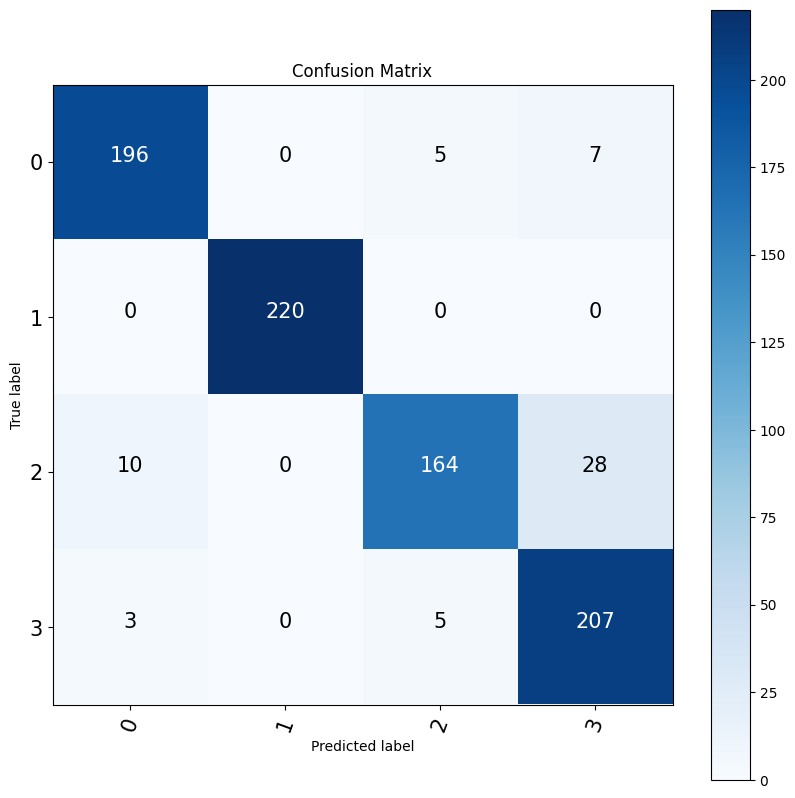

In [44]:
utils.make_confusion_matrix(all_model_results_copy["True_Preds"], all_model_results_copy["max_count"])

In [45]:
utils.calc_evaluation_metrics(all_model_results_copy["True_Preds"], all_model_results_copy["max_count"])

{'Accuracy': 93.13609467455622,
 'Precision': 0.9341514369613312,
 'Recall': 0.9341514369613312,
 'F1-Score': 0.9307845948838465}

In [47]:
all_model_results_copy.to_csv("FinalModelResults_TrueLabels.csv")